# Decistion Tree 실습
### Kaggle [Gender Recognition by Voice]
- https://www.kaggle.com/primaryobjects/voicegender


#### 작성: 고우주 | kubwa 쿱와

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [5]:
df = pd.read_csv('voice.csv')
df.head()

,meanfreq,sd,median,Q25,Q75,IQR,skew,kurt,sp.ent,sfm,...,centroid,meanfun,minfun,maxfun,meandom,mindom,maxdom,dfrange,modindx,label
0,0.059781,0.064241,0.032027,0.015071,0.090193,0.075122,12.863462,274.402906,0.893369,0.491918,...,0.059781,0.084279,0.015702,0.275862,0.007812,0.007812,0.007812,0.000000,0.000000,male
1,0.066009,0.067310,0.040229,0.019414,0.092666,0.073252,22.423285,634.613855,0.892193,0.513724,...,0.066009,0.107937,0.015826,0.250000,0.009014,0.007812,0.054688,0.046875,0.052632,male
2,0.077316,0.083829,0.036718,0.008701,0.131908,0.123207,30.757155,1024.927705,0.846389,0.478905,...,0.077316,0.098706,0.015656,0.271186,0.007990,0.007812,0.015625,0.007812,0.046512,male
3,0.151228,0.072111,0.158011,0.096582,0.207955,0.111374,1.232831,4.177296,0.963322,0.727232,...,0.151228,0.088965,0.017798,0.250000,0.201497,0.007812,0.562500,0.554688,0.247119,male
4,0.135120,0.079146,0.124656,0.078720,0.206045,0.127325,1.101174,4.333713,0.971955,0.783568,...,0.135120,0.106398,0.016931,0.266667,0.712812,0.007812,5.484375,5.476562,0.208274,male


In [11]:
# DataFrame에 null이 있으면 True, 없으면 False를 원 데이터 형태로 표현
df.isnull().sum()

meanfreq    0
sd          0
median      0
Q25         0
Q75         0
IQR         0
skew        0
kurt        0
sp.ent      0
sfm         0
mode        0
centroid    0
meanfun     0
minfun      0
maxfun      0
meandom     0
mindom      0
maxdom      0
dfrange     0
modindx     0
label       0
dtype: int64

In [12]:
# 만약 True가 있으면 DataFrame의 해당 인덱스가 출력됨
np.where(pd.isnull(df))

(array([], dtype=int64), array([], dtype=int64))

In [13]:
print(np.where([True, False, True, False, False]))

(array([0, 2], dtype=int64),)


<AxesSubplot:>

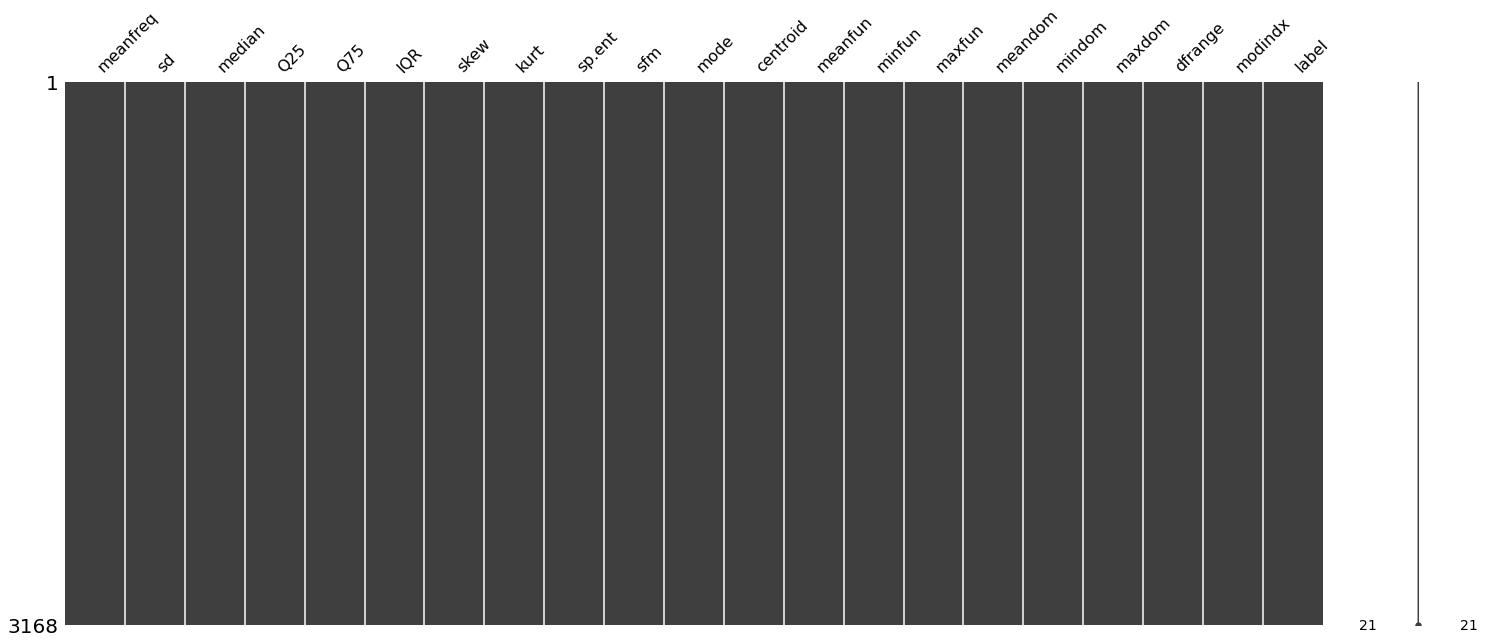

In [15]:
import missingno
missingno.matrix(df)

Awesome. We don't have any null's in the dataset. One less thing to worry about. Now let us check how the labels are distributed.

In [16]:
print("Number of male: {}".format(df[df.label == 'male'].shape[0]))
print("Number of female: {}".format(df[df.label == 'female'].shape[0]))

Number of male: 1584
Number of female: 1584


In [17]:
df['label'].value_counts()

female    1584
male      1584
Name: label, dtype: int64

<AxesSubplot:title={'center':'Pearson Correlation of Features'}>

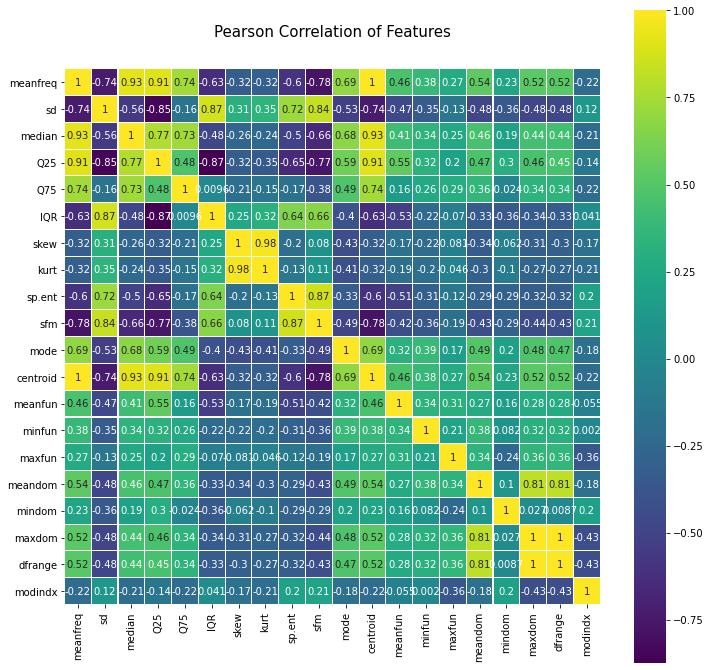

In [18]:
colormap = plt.cm.viridis
plt.figure(figsize=(12,12))
plt.title('Pearson Correlation of Features', y=1.05, size=15)
sns.heatmap(df.iloc[:,:-1].astype(float).corr(),linewidths=0.1,vmax=1.0, square=True, cmap=colormap, linecolor='white', annot=True)

In [24]:
X = df.iloc[:,0:-1]
y = df.iloc[:,-1]

0         male
1         male
2         male
3         male
4         male
         ...  
3163    female
3164    female
3165    female
3166    female
3167    female
Name: label, Length: 3168, dtype: object

In [25]:
df.columns

Index(['meanfreq', 'sd', 'median', 'Q25', 'Q75', 'IQR', 'skew', 'kurt',
       'sp.ent', 'sfm', 'mode', 'centroid', 'meanfun', 'minfun', 'maxfun',
       'meandom', 'mindom', 'maxdom', 'dfrange', 'modindx', 'label'],
      dtype='object')

In [26]:
X = df.loc[:, 'meanfreq':'modindx']
y = df['label']

In [14]:
X.head()

,meanfreq,sd,median,Q25,Q75,IQR,skew,kurt,sp.ent,sfm,mode,centroid,meanfun,minfun,maxfun,meandom,mindom,maxdom,dfrange,modindx
0,0.059781,0.064241,0.032027,0.015071,0.090193,0.075122,12.863462,274.402906,0.893369,0.491918,0.000000,0.059781,0.084279,0.015702,0.275862,0.007812,0.007812,0.007812,0.000000,0.000000
1,0.066009,0.067310,0.040229,0.019414,0.092666,0.073252,22.423285,634.613855,0.892193,0.513724,0.000000,0.066009,0.107937,0.015826,0.250000,0.009014,0.007812,0.054688,0.046875,0.052632
2,0.077316,0.083829,0.036718,0.008701,0.131908,0.123207,30.757155,1024.927705,0.846389,0.478905,0.000000,0.077316,0.098706,0.015656,0.271186,0.007990,0.007812,0.015625,0.007812,0.046512
3,0.151228,0.072111,0.158011,0.096582,0.207955,0.111374,1.232831,4.177296,0.963322,0.727232,0.083878,0.151228,0.088965,0.017798,0.250000,0.201497,0.007812,0.562500,0.554688,0.247119
4,0.135120,0.079146,0.124656,0.078720,0.206045,0.127325,1.101174,4.333713,0.971955,0.783568,0.104261,0.135120,0.106398,0.016931,0.266667,0.712812,0.007812,5.484375,5.476562,0.208274


## Train / Validation (dev) / Test

In [27]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y,
                                                    test_size = 0.2,
                                                    random_state = 123)

In [28]:
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train,
                                                  test_size = 0.375,
                                                  random_state = 123)

In [29]:
# Training 50%, validation 30%, test 20%
print(X_train.shape)
print(X_val.shape)
print(X_test.shape)

(1583, 20)
(951, 20)
(634, 20)


## Decision tree modeling

### classification:

> sklearn.tree.DecisionTreeClassifier(*, criterion='gini', splitter='best', max_depth=None, min_samples_split=2, min_samples_leaf=1, min_weight_fraction_leaf=0.0, max_features=None, random_state=None, max_leaf_nodes=None, min_impurity_decrease=0.0, min_impurity_split=None, class_weight=None, ccp_alpha=0.0)[source]¶

### Regression
> sklearn.tree.DecisionTreeRegressor(*, criterion='mse', splitter='best', max_depth=None, min_samples_split=2, min_samples_leaf=1, min_weight_fraction_leaf=0.0, max_features=None, random_state=None, max_leaf_nodes=None, min_impurity_decrease=0.0, min_impurity_split=None, ccp_alpha=0.0)[source]¶

- 나무 깊이에 대해 다른 파라미터값 부여
- 각각의 파라미터에 대해 Train set으로 모델을 생성한 후, Validation set으로 성능 평가 ==> 가장 성능이 좋은 파라미터와 모델 선택
- Test set으로 모델의 예측 성능 평가

In [30]:
from sklearn.tree import DecisionTreeClassifier

In [31]:
dt = DecisionTreeClassifier(max_depth=10)
dt.fit(X_train, y_train)

y_pred = dt.predict(X_test)

In [32]:
from sklearn import metrics

accuracy = metrics.accuracy_score(y_test, y_pred)
print(accuracy)

0.943217665615142


In [33]:
from sklearn.tree import DecisionTreeClassifier
from sklearn import metrics

depth_set = [3, 4, 5, 6, 7, 8, 9, 10]
dt_models = []
accuracy_set = []
cm_set = []
train_accuracy_set = []

for depth in depth_set:
    model = DecisionTreeClassifier(max_depth = depth, random_state = 1)
    model.fit(X_train, y_train)
    y_train_hat = model.predict(X_train)
    y_val_hat = model.predict(X_val)
    train_accuracy = metrics.accuracy_score(y_train, 
                                            y_train_hat)
    accuracy = metrics.accuracy_score(y_val, y_val_hat)
    cm = metrics.confusion_matrix(y_val, y_val_hat)
    
    dt_models.append(model)
    accuracy_set.append(accuracy)
    train_accuracy_set.append(train_accuracy)
    cm_set.append(cm)

In [34]:
from pprint import pprint
pprint(accuracy_set)

[0.961093585699264,
 0.9663512092534174,
 0.9674027339642481,
 0.9674027339642481,
 0.9684542586750788,
 0.9674027339642481,
 0.9631966351209253,
 0.9631966351209253]


In [35]:
pprint(train_accuracy_set)

[0.9734680985470625,
 0.9778900821225521,
 0.9842072015161086,
 0.9873657612128869,
 0.9917877447883765,
 0.9936828806064435,
 0.9968414403032217,
 0.998104864181933]


In [36]:
# 파라미터 탐색 결과, 가장 좋은 모델과 Validation set에 대한 정확도
max_value = max(accuracy_set)
max_index = accuracy_set.index(max_value)
print(max_index)
print(max_value)

4
0.9684542586750788


In [37]:
# 가장 좋은 모델
dt_models[max_index]

DecisionTreeClassifier(max_depth=7, random_state=1)

In [38]:
# 가장 좋은 모델을 가져와 Test set에 대해 예측 성능 평가
y_test_hat = dt_models[max_index].predict(X_test)
print(metrics.accuracy_score(y_test, y_test_hat))
print(metrics.confusion_matrix(y_test, y_test_hat))

0.9511041009463722
[[308  20]
 [ 11 295]]


In [39]:
# 최종 모델 적용
X_con = pd.concat([X_train, X_val])
y_con = pd.concat([y_train, y_val])
best_dt = dt_models[max_index]
best_dt.fit(X_con, y_con)
y_test_hat = best_dt.predict(X_test)

print(metrics.accuracy_score(y_test, y_test_hat))
print(metrics.confusion_matrix(y_test, y_test_hat))

0.9621451104100947
[[310  18]
 [  6 300]]


---

## Random Forest
- 나무의 갯수, 각 나무의 변수 선택 수를 파라미터로 설정
- 각각의 파라미터 집합에 대해 Train set으로 모델을 생성한 후, Validation set으로 성능 평가 ==> 가장 성능이 좋은 파라미터와 모델 선택
- Test set으로 모델의 예측 성능 평가

### Classification
> sklearn.ensemble.RandomForestClassifier(n_estimators=’warn’, criterion=’gini’, max_depth=None, min_samples_split=2, min_samples_leaf=1, min_weight_fraction_leaf=0.0, max_features=’auto’, max_leaf_nodes=None, min_impurity_decrease=0.0, min_impurity_split=None, bootstrap=True, oob_score=False, n_jobs=None, random_state=None, verbose=0, warm_start=False, class_weight=None)[source]¶

In [30]:
from sklearn.ensemble import RandomForestClassifier
from sklearn import metrics

In [31]:
n_estimators_set = [5, 10, 15, 20, 25, 30, 35, 40, 45, 50]
max_features_set = ['auto', 'log2']

rf_models = []
accuracy_set = []
cm_set = []

for n_estimators in n_estimators_set:
    for max_features in max_features_set:
        rf = RandomForestClassifier(n_estimators = n_estimators,
                                    max_features = max_features,
                                    random_state = 123, n_jobs=-1)
        rf.fit(X_train, y_train)
        y_val_hat = rf.predict(X_val)
        accuracy = metrics.accuracy_score(y_val, y_val_hat)
        cm = metrics.confusion_matrix(y_val, y_val_hat)

        rf_models.append(rf)
        accuracy_set.append(accuracy)
        cm_set.append(cm)

In [32]:
accuracy_set

[0.9768664563617245,
 0.9768664563617245,
 0.9810725552050473,
 0.9810725552050473,
 0.9842271293375394,
 0.9842271293375394,
 0.982124079915878,
 0.982124079915878,
 0.982124079915878,
 0.982124079915878,
 0.982124079915878,
 0.982124079915878,
 0.982124079915878,
 0.982124079915878,
 0.9789695057833859,
 0.9789695057833859,
 0.9810725552050473,
 0.9810725552050473,
 0.9779179810725552,
 0.9779179810725552]

In [33]:
# 파라미터 탐색 결과, 가장 좋은 모델과 Validation set에 대한 정확도
max_value = max(accuracy_set)
max_index = accuracy_set.index(max_value)
print(max_index)
print(max_value)

4
0.9842271293375394


In [34]:
# 가장 좋은 모델
rf_models[max_index]

RandomForestClassifier(n_estimators=15, n_jobs=-1, random_state=123)

In [35]:
# 가장 좋은 모델을 가져와 Test set에 대해 예측 성능 평가
y_test_hat = rf_models[max_index].predict(X_test)
print(metrics.accuracy_score(y_test, y_test_hat))
print(metrics.confusion_matrix(y_test, y_test_hat))

0.9794952681388013
[[317  11]
 [  2 304]]


In [36]:
best_rf = rf_models[max_index]
best_rf.fit(X_con, y_con)
y_test_hat = best_rf.predict(X_test)

print(metrics.accuracy_score(y_test, y_test_hat))
print(metrics.confusion_matrix(y_test, y_test_hat))

0.9763406940063092
[[317  11]
 [  4 302]]


In [37]:
fi = rf_models[max_index].feature_importances_

In [38]:
fi

array([0.02665029, 0.11744696, 0.01557741, 0.14570928, 0.01165043,
       0.23672374, 0.00626227, 0.00821215, 0.03609151, 0.04882698,
       0.02576906, 0.0214533 , 0.23734771, 0.00690808, 0.00495514,
       0.00763465, 0.00933277, 0.0132442 , 0.01260409, 0.00759999])

In [39]:
col_names = X.columns

In [40]:
for i, j in zip(col_names, fi): print(i, '\t', j)

meanfreq 	 0.026650286912484736
sd 	 0.11744695735780193
median 	 0.01557740626066591
Q25 	 0.145709275637132
Q75 	 0.011650426037842854
IQR 	 0.23672373959849935
skew 	 0.006262272679613459
kurt 	 0.008212147090440797
sp.ent 	 0.03609150566586908
sfm 	 0.04882698092426785
mode 	 0.02576906324893206
centroid 	 0.021453298991645532
meanfun 	 0.23734771416837894
minfun 	 0.00690808404141548
maxfun 	 0.004955142916302204
meandom 	 0.007634647157363792
mindom 	 0.009332774706036016
maxdom 	 0.013244200519478798
dfrange 	 0.012604090363160415
modindx 	 0.00759998572266878


In [41]:
print(metrics.classification_report(y_test, y_test_hat))

              precision    recall  f1-score   support

      female       0.99      0.97      0.98       328
        male       0.96      0.99      0.98       306

    accuracy                           0.98       634
   macro avg       0.98      0.98      0.98       634
weighted avg       0.98      0.98      0.98       634

